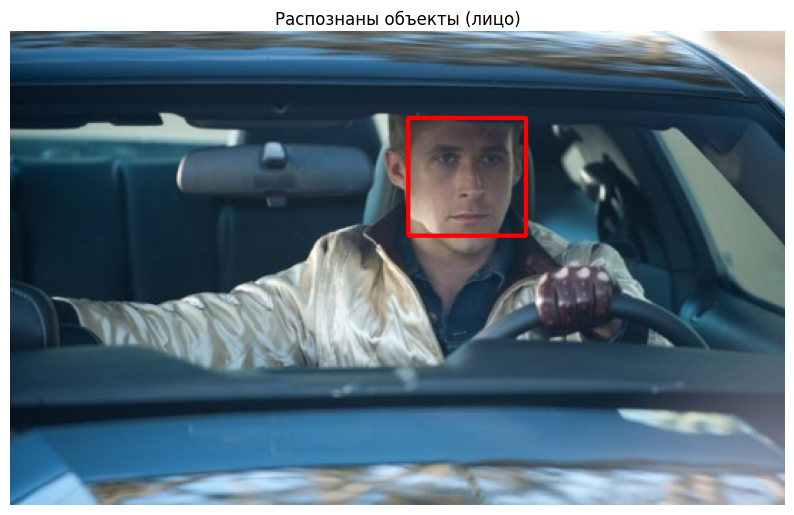

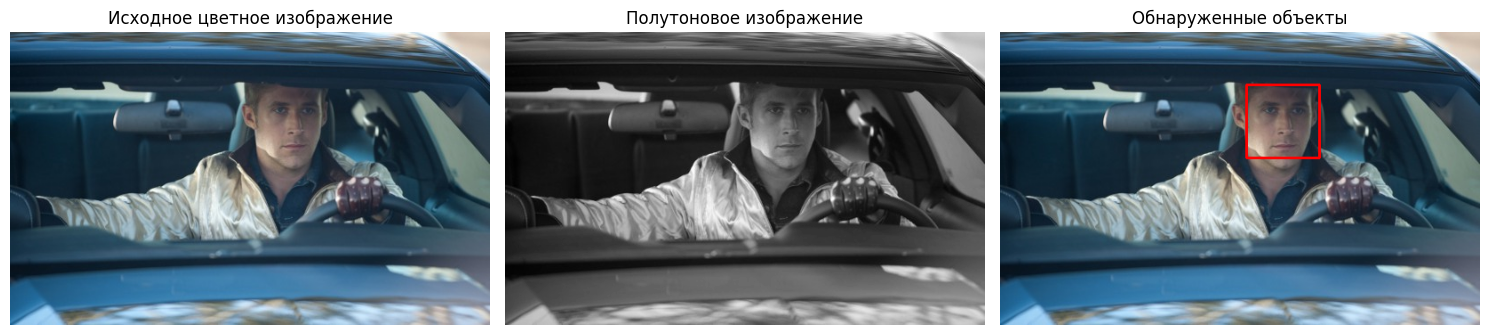

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """
    Загружает изображение и конвертирует его в цветовую модель RGB.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Изображение по пути {image_path} не найдено.")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, image_rgb

def detect_objects(image, cascade_classifier):
    """
    Обнаруживает объекты на изображении с использованием каскадного классификатора.
    
    :param image: Полутоновое изображение.
    :param cascade_classifier: Инициализированный каскадный классификатор.
    :return: Список обнаруженных объектов (координаты прямоугольников).
    """
    objects = cascade_classifier.detectMultiScale(
        image,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    return objects

def draw_detected_objects(image_rgb, objects, color=(255, 0, 0), thickness=2):
    """
    Рисует прямоугольники вокруг обнаруженных объектов на цветном изображении.
    
    :param image_rgb: Цветное изображение в формате RGB.
    :param objects: Список обнаруженных объектов (координаты прямоугольников).
    :param color: Цвет прямоугольников (по умолчанию красный).
    :param thickness: Толщина линий прямоугольников.
    :return: Изображение с нарисованными прямоугольниками.
    """
    for (x, y, w, h) in objects:
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), color, thickness)
    return image_rgb

def show_image(image, title='Image'):
    """
    Отображает изображение с использованием matplotlib.
    
    :param image: Изображение в формате RGB или оттенков серого.
    :param title: Заголовок изображения.
    """
    plt.figure(figsize=(10, 8))
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Путь к изображению
image_path = '../images/img-face.jpg'

# Загрузка изображений
color_image, color_image_rgb = load_image(image_path)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Загрузка каскадного классификатора (например, для распознавания лиц)
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

if face_cascade.empty():
    raise IOError('Не удалось загрузить каскадный классификатор.')

# Обнаружение объектов на полутоновом изображении
detected_faces = detect_objects(gray_image, face_cascade)

# Рисование обнаруженных объектов на цветном изображении
image_with_detections = draw_detected_objects(color_image_rgb.copy(), detected_faces, color=(255, 0, 0), thickness=2)

# Отображение результатов
show_image(image_with_detections, title='Распознаны объекты (лицо)')

# Визуализация исходного и полутонового изображений
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(color_image_rgb)
plt.title('Исходное цветное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Полутоновое изображение')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_with_detections)
plt.title('Обнаруженные объекты')
plt.axis('off')

plt.tight_layout()
plt.show()